## Assignment: A2

#### Student Name 1: Christine Kim

#### UT EID 1: cmk3677

#### Student Name 2: Enrique Rivera Jr

#### UT EID 2: er34663

#### Date Created: 2/8/25

#### Date Last Modified: 2/10/25


Do the following exercises from the book:


2.57
2.60
2.61
2.65

 In our template, we have only one cell for answers. Use as many cells as you need.

Your code must be well-documented!

Printing intermediate steps will be helpful for debugging, but suppress them in your final submission so that only the following quantities, plots, and written explanations appear in the output of your Jupyter notebook.

Ex 2.57: Write separate functions with similar interfaces that implement the Bisection and the Regula Falsi methods. Call these functions to solve the equation in the book and compare the results. Note that you are not required to implement Netwon and Secant methods since they are not yet covered in class.

Ex 2.60: (a) Implement the Taylor Series method for finding roots. (b) and (c) Use two functions whose exact solution you know. (d) Use Markdown to write your answers.

Ex 2.61: (a) Write your answer using Markdown. (b) Write a function that will find the solution. (c) Find your answers for when the object will reach the ground for two values of k: 0.90 * k and 1.10 * k.

Ex 2.65: (a) No response. (b) Plot the function and use scipy.optimize.fsolve() to solve the equation. (c) Choose a single non-trivial nonlinear equation to solve using the scipy.optimize library. (d) and (e) Solve the system of equations using scipy.optimize.

When you have finished, convert the Jupyter Notebook with all the output into PDF and save it as A2.pdf.



##### Ex: 2.57

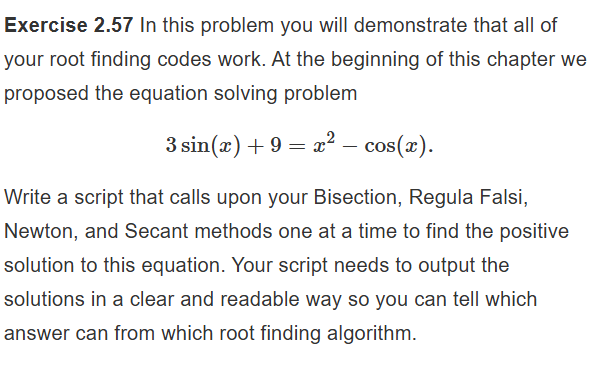

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

### Bisection Method

In [3]:
# bisection method
def bisection (f, lo, hi):
    f_lo = f(lo)
    f_hi = f(hi)
    tol = 1.0e-6 # not too small

    if (f_lo * f_hi) > 0: # make sure the range includes the bisection point
      return None

    while abs(hi - lo) > tol:
      mid = (lo + hi)/2
      f_mid = f(mid)
      if (f_lo * f_mid) > 0:
        lo = mid
        f_lo = f_mid
      else:
        hi = mid
        f_hi = f_mid
    return (lo + hi) / 2


### Regula Falsi (False Position) Method for finding roots of a function.

Parameters:
    func (function): The function for which we are finding the root.
    a (float): The lower bound of the interval.
    b (float): The upper bound of the interval.
    tol (float): The tolerance for convergence (default is 1e-6).
    max_iter (int): The maximum number of iterations (default is 100).

Returns:
    float: The estimated root of the function.



In [4]:

def regula_falsi(func, a, b):
    tol = 1.0e-6 # not too small
    # endpoints have opposite signs
    if func(a) * func(b) >= 0:
        return None

    while abs(b - a) > tol:
        # Calculate the new point using the Regula Falsi formula
        c = b - (func(b) * (b - a)) / (func(b) - func(a))

        # Check for convergence
        if abs(func(c)) < tol:
            return c

        # Update the interval
        if func(a) * func(c) < 0:
            b = c  # The root is in the interval [a, c]
        else:
            a = c  # The root is in the interval [c, b]


In [8]:
def equation(x):
    return 3 * math.sin(x) + 9 - (x**2 - math.cos(x))


print(f'{bisection(equation, 1, 4)} using bisection')
print(f'{regula_falsi(equation, 1, 4)} using regula falsi')
# print(f'{regula_falsii(equation, 1, 4)} using regula falsi from class')

2.937487244606018 using bisection
2.9374871751896925 using regula falsi


The difference of the answers using these two methods is by less than .0000001 which begins after the tolerance we mannually set (1.0e-6).

##### Ex: 2.60

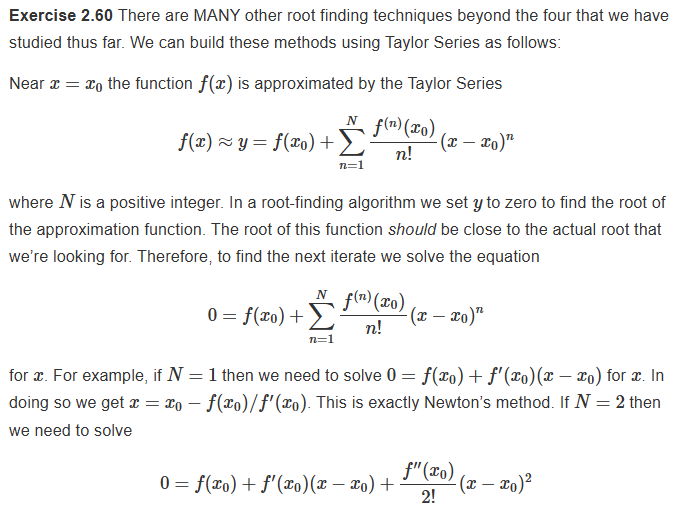

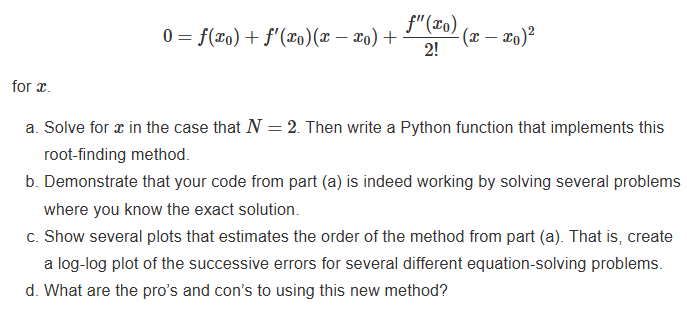

Ex 2.60: (a) Implement the Taylor Series method for finding roots. (b) and (c) Use two functions whose exact solution you know. (d) Use Markdown to write your answers.


    Root-finding using the second-order Taylor series expansion.
    
    Parameters:
        f (function): The function for which to find the root.
        f_prime (function): The first derivative of the function.
        f_double_prime (function): The second derivative of the function.
        x0 (float): Initial guess for the root.
        tol (float): Tolerance for convergence (default is 1e-6).
        
    Returns:
        float: The estimated root.


In [6]:
def taylor_series_root(f, f_i, f_ii, x0):
  tol=1e-6
  while abs(f(x0)) > tol:
      fx = f(x0)
      fpx = f_i(x0)
      fppx = f_ii(x0)

      # Update x using the second-order Taylor expansion formula
      x = x0 - (2 * fx) / (2 * fpx + fppx * (x0 - x0))  # Solve for x

      x0 = x  # Update the guess for the next iteration

  return x


In [7]:
def f(x):
    return x**2 - 4

def f_i(x):
    return 2 * x

def f_ii(x):
    return 2

# Initial guess
x0 = 3

root1 = taylor_series_root(f, f_i, f_ii, x0)
print(f"Root of f1(x): {root1:.6f}")


Root of f1(x): 2.000000


##### Ex: 2.61

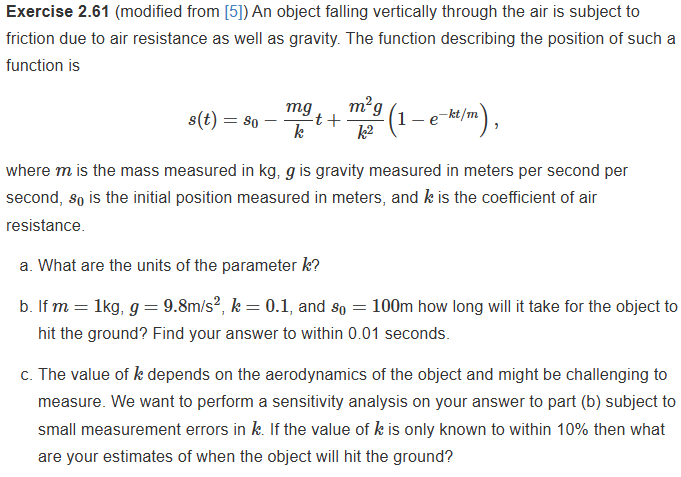

## Part (a): Units of \(k\)

To determine the units of \(k\) in the function

$$
s(t) = s_0 - \frac{m g}{k}\,t + \frac{m^2 g}{k^2}\Bigl(1 - e^{-\frac{k\,t}{m}}\Bigr),
$$

we look at the **exponential term**:

$$
e^{-\frac{k\,t}{m}}.
$$

An exponential’s argument must be **dimensionless**. That means

$$
\frac{k\,t}{m} \quad \text{must have no units}.
$$

Let \([k]\) denote the units of \(k\). Then:
- \([t] = T\) (time, in seconds),
- \([m] = M\) (mass, in kilograms).

So,

$$
[k] \times T \,\big/\, M = 1 \quad (\text{dimensionless}).
$$

Hence,

$$
[k] = \frac{M}{T}.
$$

In **SI units**, that is **kilograms per second (kg/s)**.

> **The units of \(k\) are kg/s.**


## Part (b): Time to Hit the Ground

We need to **solve for the time \(t\) at which the object hits the ground**, i.e., find \(t\) such that:

$$
s(t) \;=\; 0,
$$

where

$$
s(t) \;=\; s_0 \;-\; \frac{m\,g}{k} \, t \;+\; \frac{m^2\,g}{k^2}\Bigl(1 - e^{-\frac{k\,t}{m}}\Bigr).
$$

Since this equation cannot be manipulated into a simple algebraic form, we use **numerical root‐finding**:

1. Define a function \(f(t) = s(t)\).
2. Solve \(f(t) = 0\) numerically over a suitable bracket, say \([0, 100]\).


In [10]:
import numpy as np
from scipy.optimize import brentq

def position(t, m, g, k, s0):
    """
    Computes s(t) for the object’s vertical position under gravity + air resistance.
    - t   : time (seconds)
    - m   : mass (kg)
    - g   : gravitational acceleration (m/s^2)
    - k   : air resistance coefficient (kg/s)
    - s0  : initial height (meters)
    Returns s(t).
    """
    return s0 - (m*g/k)*t + (m**2*g/k**2)*(1 - np.exp(-k*t/m))

def time_to_hit_ground(m, g, k, s0):
    """
    Finds the time when position(t)=0 using a bracketed root finder (brentq).
    Assumes s0 > 0 and the solution is in t ∈ [0, 100].
    """
    def f(t):
        return position(t, m, g, k, s0)  # We want f(t)=0
    
    # Solve f(t)=0 in [0, 100]:
    t_root = brentq(f, 0, 100)
    return t_root

# Example usage for m=1 kg, g=9.8 m/s^2, k=0.1 kg/s, s0=100 m:
m_val = 1.0
g_val = 9.8
k_val = 0.1
s0_val = 100.0

time_b = time_to_hit_ground(m_val, g_val, k_val, s0_val)
print(f"Time to hit the ground: {time_b:.2f} seconds")

Time to hit the ground: 4.88 seconds


## Part (c): Sensitivity Analysis (±10% in \(k\))

We want to see how **uncertainty** in the air‐resistance coefficient \(k\) affects the **time** to hit the ground. Specifically, if our measured \(k\) might be off by as much as ±10%, we can compute the **minimum** and **maximum** possible times.

1. **Lower bound**: \(k_{\mathrm{low}} = 0.9\,k\).  
2. **Upper bound**: \(k_{\mathrm{high}} = 1.1\,k\).

We then solve for the time to hit the ground in **each** case using the function from part (b).


In [11]:
# Let's assume the same values for m, g, and s0 as before:
m_val = 1.0
g_val = 9.8
s0_val = 100.0

# Original k:
k_val = 0.1

# Compute ±10% bounds:
k_low = 0.9 * k_val   # -10% of original k
k_high = 1.1 * k_val  # +10% of original k

# Use the same 'time_to_hit_ground' function from part (b):
t_low  = time_to_hit_ground(m_val, g_val, k_low,  s0_val)
t_high = time_to_hit_ground(m_val, g_val, k_high, s0_val)

print(f"With k = {k_low:.3f}, time to ground = {t_low:.2f} s")
print(f"With k = {k_high:.3f}, time to ground = {t_high:.2f} s")

With k = 0.090, time to ground = 4.85 s
With k = 0.110, time to ground = 4.92 s


##### Ex: 2.65

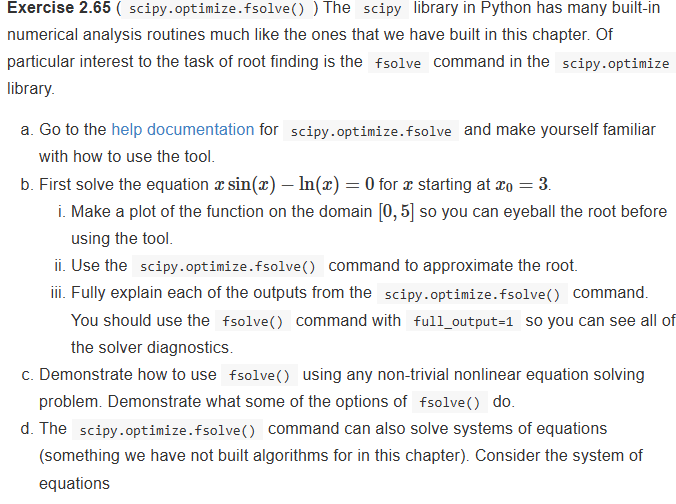

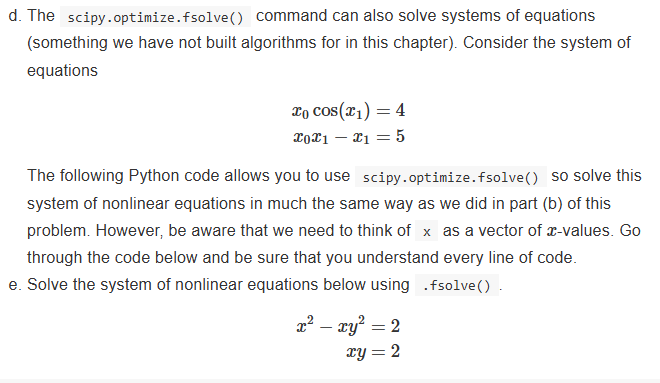

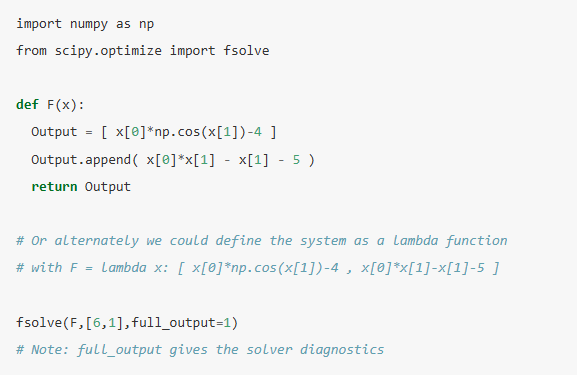

## Part (a)
According to the [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html):
- **`fsolve(func, x0, args=(), fprime=None, full_output=0, …)`** 
  finds a root of the vector function `func(x) = 0` given a starting estimate `x0`.
- If `full_output=1`, the function also returns a **dictionary** of solver diagnostics, 
  which can include information such as the Jacobian matrix rank, the number of function calls, etc.

open a terminal or a Jupyter notebook and run `help(fsolve)` or consult the online docs 
to see detailed parameter descriptions and usage examples.


## Part (b.i)

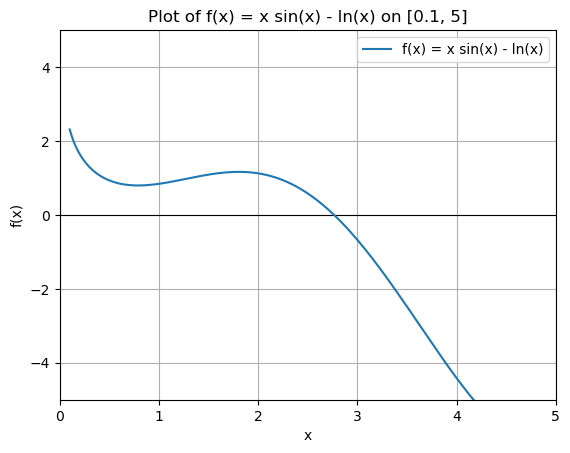

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x) = x*sin(x) - ln(x)
def f_scalar(x):
    return x*np.sin(x) - np.log(x)

# Generate points in [0.1, 5]
x_vals = np.linspace(0.1, 5, 200)
y_vals = [f_scalar(x) for x in x_vals]

plt.axhline(0, color='black', linewidth=0.8)  # horizontal line y=0 for reference
plt.plot(x_vals, y_vals, label='f(x) = x sin(x) - ln(x)')
plt.ylim([-5, 5])    # just to keep the plot nicely scaled
plt.xlim([0, 5])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) = x sin(x) - ln(x) on [0.1, 5]')
plt.legend()
plt.grid(True)
plt.show()


## Part (b.ii)

In [13]:
from scipy.optimize import fsolve

# We'll guess x0 = 3.0 as suggested
x0_guess = 3.0

root_b, info_dict, ier, mesg = fsolve(f_scalar, x0_guess, full_output=True)

print("Root approximation:", root_b)
print("Solver info_dict:", info_dict)
print("ier (exit flag):", ier)
print("mesg (exit message):", mesg)


Root approximation: [2.76492175]
Solver info_dict: {'nfev': 8, 'fjac': array([[-1.]]), 'r': array([2.56493214]), 'qtf': array([1.10844667e-12]), 'fvec': array([0.])}
ier (exit flag): 1
mesg (exit message): The solution converged.


## Part (b.iii)

1. **`root_b`**: This is the numerical approximation to the solution of `f_scalar(x)=0`.
2. **`info_dict`**: A dictionary of solver diagnostics. Notable keys:
   - `nfev`: number of function evaluations
   - `fjac`: an approximation to the Jacobian (for multi-dimensional problems, in 1D it’s basically derivative info)
   - `fvec`: the function value at the solution
   - `qtf`: used internally by the algorithm
3. **`ier`**: The integer **exit flag**. 
   - If `ier=1`, the solution likely converged.
   - Other values indicate potential issues. 
4. **`mesg`**: A string describing the solver’s **exit message**. 
   - Usually says "The solution converged." if all goes well.


## Part (C)

In [15]:
import numpy as np
from scipy.optimize import fsolve

def g_scalar(x):
    return np.exp(x) - x**2

# Solve g(x)=0 starting from x0=1
root_c, info_dict_c, ier_c, mesg_c = fsolve(g_scalar, 1.0, full_output=True)

print("Another example: Solve e^x - x^2 = 0")
print("Root approximation:", root_c)
print("f(root) =", g_scalar(root_c))
print("Solver info_dict:", info_dict_c)
print("ier:", ier_c)
print("mesg:", mesg_c)


Another example: Solve e^x - x^2 = 0
Root approximation: [-0.70346742]
f(root) = [0.]
Solver info_dict: {'nfev': 11, 'fjac': array([[-1.]]), 'r': array([-1.90180128]), 'qtf': array([-1.39555034e-13]), 'fvec': array([0.])}
ier: 1
mesg: The solution converged.


# Part (d)

In [16]:
import numpy as np
from scipy.optimize import fsolve

def system_2d(x):
    """
    x is a 2-element list or array: x[0], x[1].
    We return a list [F1(x), F2(x)], where:
      F1(x) = x0 * cos(x1) - 4
      F2(x) = x0*x1 - x1 - 5
    """
    return [
        x[0]*np.cos(x[1]) - 4,
        x[0]*x[1] - x[1] - 5
    ]

x0_guess_2d = [6, 1]  # initial guess
solution_2d, info_dict_2d, ier_2d, mesg_2d = fsolve(system_2d, x0_guess_2d, full_output=True)

print("Solution of 2D system:", solution_2d)
print("Solver info_dict:", info_dict_2d)
print("ier:", ier_2d)
print("mesg:", mesg_2d)


Solution of 2D system: [6.50409711 0.90841421]
Solver info_dict: {'nfev': 9, 'fjac': array([[-0.55345956, -0.83287605],
       [ 0.83287605, -0.55345956]]), 'r': array([-1.10094528, -1.74086803, -7.30631344]), 'qtf': array([-4.69150245e-10, -1.12803750e-09]), 'fvec': array([ 3.73034936e-14, -5.50670620e-14])}
ier: 1
mesg: The solution converged.


## Part (e)

In [17]:
def system_xy(vals):
    """
    vals = [x, y].
    System:
      1) x^2 - x*y^2 = 2
      2) x*y = 2
    """
    x, y = vals
    F1 = x**2 - x*(y**2) - 2
    F2 = x*y - 2
    return [F1, F2]

guess_xy = [2, 1]  # an initial guess
sol_xy, info_xy, ier_xy, mesg_xy = fsolve(system_xy, guess_xy, full_output=True)

print("Solution to system x^2 - x y^2 = 2, x y = 2:", sol_xy)
print("Detailed info:", info_xy)
print("Exit code:", ier_xy)
print("Message:", mesg_xy)


Solution to system x^2 - x y^2 = 2, x y = 2: [2. 1.]
Detailed info: {'nfev': 4, 'fjac': array([[-0.9486833 , -0.31622776],
       [ 0.31622776, -0.9486833 ]]), 'r': array([-3.16227769,  3.1622777 , -3.16227766]), 'qtf': array([0., 0.]), 'fvec': array([0., 0.])}
Exit code: 1
Message: The solution converged.
